In [ ]:
from skimage import transform
from skimage.transform import rotate, AffineTransform,warp
from skimage.util import random_noise
from skimage.filters import gaussian
from skimage.io import imread
from scipy import ndimage
import matplotlib.pyplot as plt
import random
from skimage import img_as_ubyte
import os

In [ ]:
def plot_side(img1, img2, title1, title2, cmap = None):
    fig = plt.figure(tight_layout='auto', figsize=(10, 7))
    fig.add_subplot(221)
    plt.title(title1)
    plt.imshow(img)
    fig.add_subplot(222)
    plt.title(title2)
    plt.imshow(img2, cmap = None)
    return fig

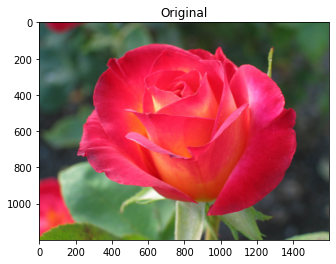

In [ ]:
# load Image
img = imread('/content/Rose.jpeg') / 255
# plot original Image
plt.imshow(img)
plt.title('Original')
plt.show()

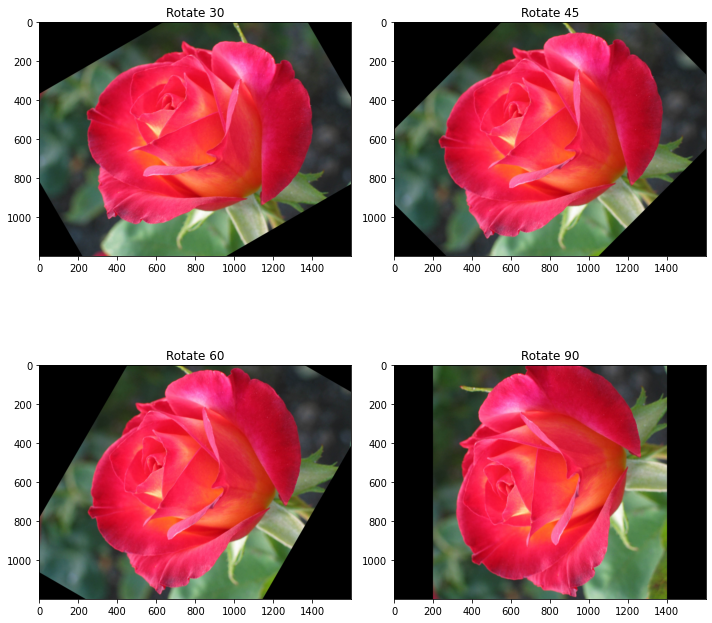

In [ ]:
# image rotation using skimage.transformation.rotate
rotate30 = rotate(img, angle=30)
rotate45 = rotate(img, angle=45)
rotate60 = rotate(img, angle=60)
rotate90 = rotate(img, angle=90)
fig = plt.figure(tight_layout='auto', figsize=(10, 10))
fig.add_subplot(221)
plt.title('Rotate 30')
plt.imshow(rotate30)
fig.add_subplot(222)
plt.title('Rotate 45')
plt.imshow(rotate45)
fig.add_subplot(223)
plt.title('Rotate 60')
plt.imshow(rotate60)
fig.add_subplot(224)
plt.title('Rotate 90')
plt.imshow(rotate90)
plt.show()

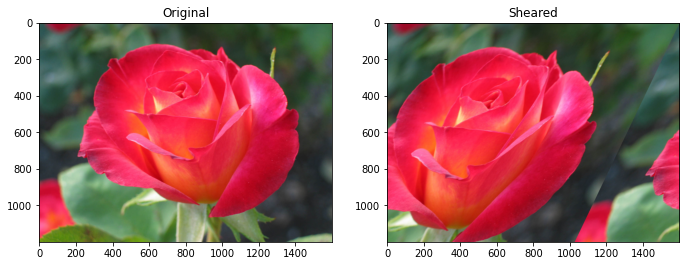

In [ ]:
# image shearing using sklearn.transform.AffineTransform
# try out with differnt values of shear
tf = AffineTransform(shear=-0.5)
sheared = transform.warp(img, tf, order=1, preserve_range=True, mode='wrap')
sheared_fig = plot_side(img, sheared, 'Original', 'Sheared')

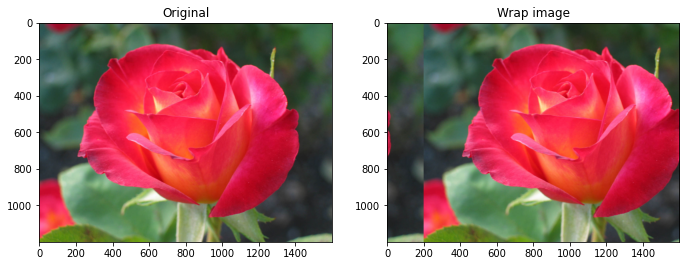

In [ ]:
#Affine Transformation(warping)
transform = AffineTransform(translation=(-200,0))

# (-200,0) are x and y coordinate, change it see the effect
warp_image = warp(img,transform, mode="wrap") #mode parameter is optional
# mode= {'constant', 'edge', 'symmetric', 'reflect', 'wrap'}
#these are possible values of mode, you can try them and decide
#which one to use, default value for mode is constant
warp_fig = plot_side(img,warp_image , 'Original', 'Wrap image')

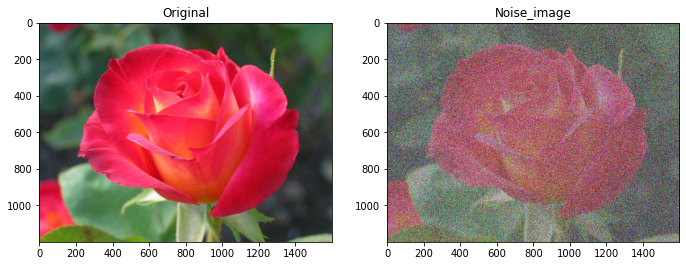

In [ ]:
#image Noising
noisy_image = random_noise(img, var=0.1**.01)
noise_fig = plot_side(img,noisy_image , 'Original', 'Noise_image')

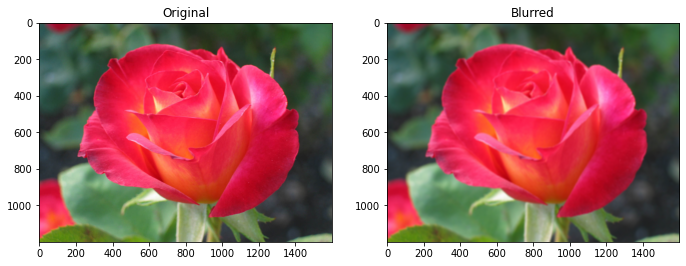

In [ ]:
#image Blurring
from scipy import ndimage
blured_image = ndimage.uniform_filter(img, size=(11, 11, 1))
noise_fig = plot_side(img,blured_image , 'Original', 'Blurred')

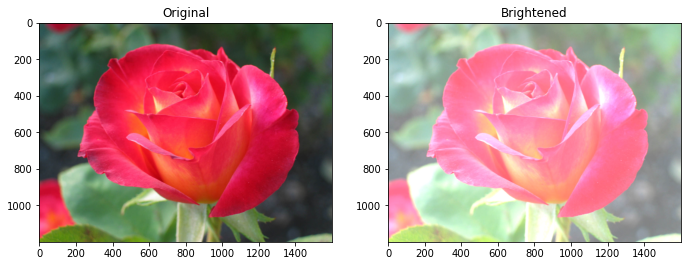

In [ ]:
# Increasing the brighness of the Image
# Note: Here we add 100/255 since we scaled Intensity values of
#Image when loading (by dividing it 255)
highB = img + (100/255)
fig_highB = plot_side(img, highB, 'Original', 'Brightened')
plt.show()

In [ ]:
import numpy as np

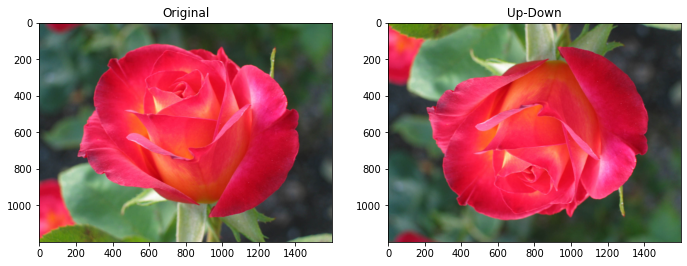

In [ ]:
# flip up-down using np.flipud
up_down = np.flipud(img)
fig_updown = plot_side(img, up_down, 'Original', 'Up-Down')
plt.show()

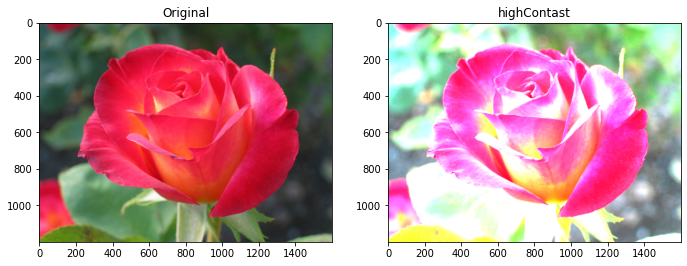

In [ ]:
# Increasing the contrast of the Image
# Note: Here we add 100/255 since we scaled Intensity
#values of Image when loading (by dividing it 255)
highC = img * 3
fig_highB = plot_side(img, highC, 'Original', 'highContast')
plt.show()

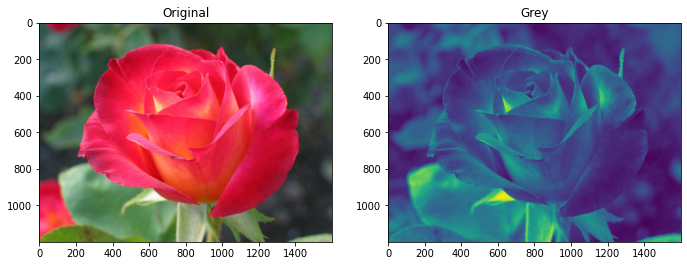

In [ ]:
#GreyScale
from skimage.color import rgb2gray
gray_scale_image = rgb2gray(img)
Grey = plot_side(img,gray_scale_image , 'Original', 'Grey')
plt.show()

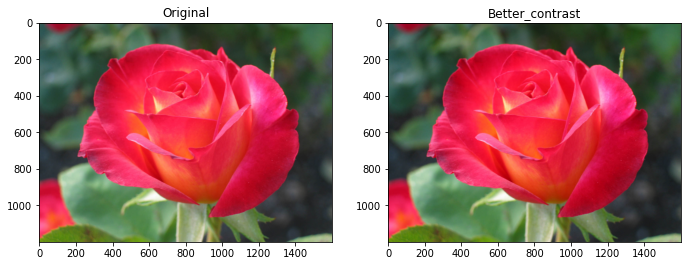

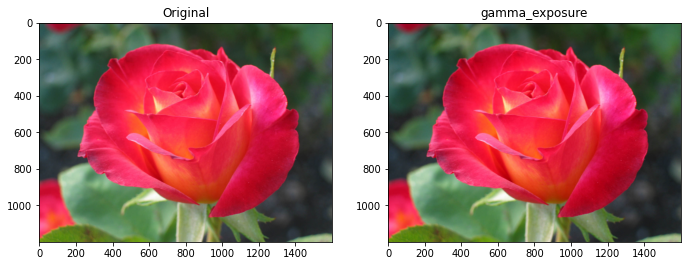

In [ ]:
import numpy as np
from skimage import exposure
v_min, v_max = np.percentile(img, (0.2, 99.8))
better_contrast = exposure.rescale_intensity(img, in_range=(v_min, v_max))
contrast = plot_side(img,better_contrast , 'Original', 'Better_contrast')
plt.show()
#Gamma correction
adjusted_gamma_image = exposure.adjust_gamma(img, gamma=0.4, gain=0.9)
gamma = plot_side(img,better_contrast , 'Original', 'gamma_exposure')
plt.show()

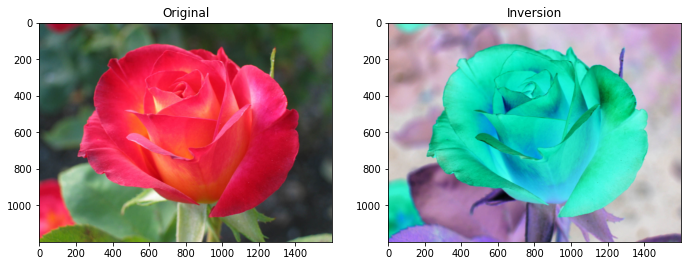

In [ ]:
from skimage import util
import numpy as np
color_inversion = util.invert(img)
gamma = plot_side(img,color_inversion , 'Original', 'Inversion')
plt.show()